In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import matplotlib.cm as cm
colormap = cm.get_cmap("hsv")

C:\Users\alexk\AppData\Local\Temp\ipykernel_20656\2988994069.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap("hsv")


In [28]:
m10_v10_l3=torch.tensor([[[  9.7105,  23.6027,  44.3489,  33.3333,  84.7222,  98.6111,  11.7733],
         [ 10.1083,  12.1804,  31.8595,  11.1111,  45.0754,  87.5569,  14.2767],
         [  9.0958,  11.2737,  26.9116,  11.7989,  38.0240,  74.0320,  19.9767],
         [ 11.3455,  11.5460,  24.0364,  12.8312,  28.0766,  58.1806,  32.8567],
         [ 18.9516,  34.7318,  59.0472,  28.2781,  48.8911,  92.2143,  83.5933],
         [  0.0000,  22.2222,  80.4843,  60.8826,  78.3892,  99.7651,  97.4567],
         [  0.0000,  33.3333,  70.0000,  70.1424,  84.0120,  99.9252,  98.8833],
         [  0.0000,  33.3333,   0.0000,  66.6667,  80.5939,  99.9353,  99.5133],
         [  0.0000,   0.0000,   0.0000,   0.0000,  77.1973,  99.9562,  99.7400],
         [  0.0000,   0.0000,   0.0000,   0.0000,  76.8091,  99.9364,  99.8567]],

        [[  9.5038,  19.0420,  47.8444,  62.5000,  75.3420,  97.6190,  11.0300],
         [  8.9225,  16.5747,  30.5930,  23.9768,  44.4899,  84.1359,  11.8000],
         [  9.3426,  13.2204,  25.1192,  19.3260,  33.9250,  70.8517,  15.6633],
         [ 10.7982,  11.7762,  21.3015,  14.1907,  26.1606,  55.1463,  23.2900],
         [ 20.0102,  21.4564,  38.1320,  23.5970,  43.1087,  77.0773,  56.8067],
         [  0.0000,  56.5614,  60.3581,  61.4870,  81.1041,  99.3776,  92.9133],
         [  0.0000,  55.5556,  66.3818,  65.4282,  83.0387,  99.8129,  97.2167],
         [  0.0000,  33.3333,  57.6190,  67.5214,  87.4169,  99.8826,  99.0733],
         [  0.0000,   0.0000,  66.6667,  66.6667,  92.1989,  99.8977,  99.7267],
         [  0.0000,   0.0000,   0.0000,   0.0000,  91.4559,  99.9598,  99.9133]],

        [[  9.8318,  24.5414,  50.7836,  54.4949,  87.0370, 100.0000,  10.6333],
         [ 10.2215,  18.0326,  33.6448,  19.6620,  47.8547,  88.8889,  11.6533],
         [  9.9117,  14.8178,  28.3070,  21.1096,  40.8857,  66.3179,  13.2233],
         [  9.9771,  12.3033,  24.6032,  15.3052,  29.7689,  60.2005,  16.7100],
         [ 12.1553,  13.2543,  23.3028,  16.1606,  27.1564,  46.7853,  25.0267],
         [ 39.3665,  49.5183,  64.3777,  64.5742,  79.4796,  96.4976,  84.0400],
         [ 16.6667,  76.3095,  93.0359,  93.8039,  97.0639,  99.7416,  98.9100],
         [  0.0000,  33.3333,  97.2222,  96.9697,  98.8372,  99.8534,  99.7800],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9532,  99.9533],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967]],

        [[  9.7927,  26.7271,  57.2829,  52.5000,  69.4444,   0.0000,  10.3400],
         [ 10.1731,  19.7556,  41.1482,  33.7793,  55.0000,  66.6667,  11.1967],
         [  9.6354,  15.9895,  31.9543,  20.6228,  50.1677, 100.0000,  11.6233],
         [  9.8045,  12.3550,  25.7000,  16.3779,  31.5362,  60.2683,  13.3533],
         [  9.3094,  12.2643,  19.0181,  13.9034,  22.7286,  35.2690,  16.4800],
         [ 25.3867,  31.1696,  41.5222,  39.5608,  52.3839,  67.7296,  52.7900],
         [ 33.3333,  89.5563,  94.5861,  96.5279,  99.0399,  99.7990,  99.4833],
         [  0.0000,   0.0000, 100.0000,  66.6667,  99.7322,  99.9693,  99.9633],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967]],

        [[ 10.1603,  32.0116,  80.0000,  55.5556,  66.6667,   0.0000,  10.5700],
         [ 10.0078,  22.5703,  43.8870,  51.1841,  55.5556,   0.0000,  10.8233],
         [ 10.0796,  16.7619,  32.6198,  22.8979,  45.7895,  66.6667,  11.4467],
         [  9.1338,  13.5372,  26.2915,  16.5038,  37.2520,  60.0119,  12.1267],
         [  9.7285,  11.7459,  18.8561,  14.5174,  22.4968,  30.1635,  14.3900],
         [ 15.6645,  16.8386,  22.1566,  19.8578,  25.9047,  32.7084,  25.1000],
         [  0.0000, 100.0000,  99.1926,  98.3532,  99.4755,  99.8519,  99.7467],
         [  0.0000,   0.0000,  66.6667,  33.3333, 100.0000,  99.9866,  99.9867],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]],

        [[  9.9855,  34.2222,  64.4444,  44.4444,   0.0000,   0.0000,  10.2600],
         [  9.9684,  19.3919,  47.2296,  56.6138,  33.3333,   0.0000,  10.4000],
         [ 10.1493,  17.5297,  36.8418,  31.4700,  47.7778,   0.0000,  11.2133],
         [  9.5890,  14.6428,  31.0791,  19.4860,  38.7672,  86.6667,  11.9133],
         [ 10.3761,  11.9288,  18.0980,  14.1950,  22.1203,  27.6558,  13.1967],
         [ 11.2583,  12.6829,  15.2900,  14.3847,  18.3172,  22.5046,  17.0100],
         [  0.0000, 100.0000, 100.0000, 100.0000,  99.8393,  99.8617,  99.8600],
         [  0.0000,   0.0000,   0.0000,   0.0000,  66.6667, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]]])
m10_v10_l2=torch.tensor([[[  9.5174,  26.6651,  51.2188,  53.7899,  82.1377,  66.6667,  11.7100],
         [  9.7719,  21.5343,  41.6631,  37.4857,  57.3635,  77.1429,  14.3567],
         [  9.4645,  16.4576,  28.6291,  26.4892,  45.0808,  67.5235,  18.7400],
         [  9.6110,  14.7799,  24.0579,  22.5060,  37.0409,  57.5217,  31.2800],
         [  6.5278,  37.6460,  31.3294,  85.0266,  93.3369,  98.8105,  93.5933],
         [  6.6667,  20.3704,  38.2023,  16.6667,  61.7061,  99.8363,  96.3933],
         [  0.0000,  27.7778,  51.1129,  66.6667,  86.9621,  99.8776,  98.5967],
         [  0.0000,   0.0000,  39.9733,  33.3333,  84.4558,  99.9185,  99.3400],
         [  0.0000,   0.0000,  47.2974,   0.0000,  77.4661,  99.9362,  99.6967],
         [  0.0000,   0.0000,  33.4615,   0.0000,  48.7485,  99.9599,  99.8167]],

        [[  9.3561,  27.3374,  55.7547,  58.7611,  87.9630, 100.0000,  11.1033],
         [  9.3640,  18.5334,  37.3014,  36.0463,  60.8861,  91.6667,  12.4233],
         [  8.2323,  14.7121,  28.5362,  25.5101,  44.2038,  72.8571,  15.1300],
         [  8.7673,  12.5543,  21.1984,  19.6811,  32.1116,  49.5424,  22.3900],
         [ 11.0734,  21.7694,  27.7722,  50.9253,  69.7030,  90.8713,  71.2433],
         [ 24.3834,  37.1184,  45.5818,  52.1991,  79.1927,  99.0157,  90.6500],
         [ 12.7273,  50.1587,  54.5998,  61.7725,  87.2810,  99.8065,  96.9033],
         [ 33.3333,   8.3333,  62.1833,  33.3333,  90.3366,  99.8918,  98.9000],
         [  0.0000,  33.3333,  70.9735,  33.3333,  88.1551,  99.9322,  99.6467],
         [  0.0000,   0.0000,  66.6667,   0.0000,  78.7963,  99.8962,  99.8067]],

        [[ 10.0515,  28.2002,  53.4299,  58.7302,  60.0000,  33.3333,  10.9133],
         [  9.5421,  20.4003,  38.5709,  37.8856,  61.2626,  33.3333,  11.3067],
         [  8.7802,  16.4285,  32.6082,  26.2161,  48.1400,  63.8695,  12.8900],
         [  9.2030,  13.2357,  23.2401,  20.0500,  31.7840,  50.0119,  16.6667],
         [ 10.3469,  14.7952,  20.2215,  19.6949,  29.3808,  46.5572,  26.9233],
         [ 23.6151,  34.2528,  42.3423,  53.6868,  70.7954,  95.4255,  77.4933],
         [ 69.8592,  74.9093,  82.1410,  81.7159,  94.1626,  99.6793,  97.5367],
         [ 33.3333,  72.2222,  94.8054,  95.2381,  97.1900,  99.8549,  99.6700],
         [  0.0000,   0.0000,  66.6667,   0.0000,  98.3476,  99.9431,  99.9367],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9633,  99.9633]],

        [[  9.6780,  32.7094,  61.8713,  53.3333,  50.0000,   0.0000,  10.2533],
         [  9.7416,  20.4986,  48.8266,  43.5317,  72.2222,   0.0000,  10.7900],
         [  9.5443,  16.5862,  33.5054,  32.3212,  54.1245,  66.6667,  11.7800],
         [  9.3052,  13.8220,  25.0729,  21.3599,  34.5616,  47.0833,  13.9633],
         [  9.7540,  12.7791,  19.4108,  16.2609,  24.0381,  34.9332,  17.9300],
         [ 21.7993,  27.6568,  41.5435,  41.6553,  58.4553,  83.5643,  61.2833],
         [100.0000,  92.1431,  96.1053,  94.7459,  98.2840,  99.8107,  99.2800],
         [  0.0000,   0.0000, 100.0000,  66.6667,  99.4461,  99.9214,  99.9100],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9667,  99.9667],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9900,  99.9900]],

        [[  9.9729,  28.8601,  62.3737,  55.5556,  66.6667,   0.0000,  10.3567],
         [  9.6230,  19.5960,  41.3855,  51.5262,  77.7778,   0.0000,  10.2933],
         [  9.6028,  17.1981,  33.5548,  24.7069,  39.4319,  33.3333,  11.0900],
         [  9.0335,  13.6272,  26.8710,  21.3284,  35.7023,  48.0057,  12.3067],
         [  9.5391,  11.4808,  16.5449,  14.7595,  20.7388,  29.4809,  13.8967],
         [ 12.4651,  15.3280,  19.5855,  17.4264,  24.1067,  35.4360,  24.6167],
         [100.0000,  98.0392,  98.5186,  97.9967,  99.4715,  99.7917,  99.6867],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000,  99.9900,  99.9900],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967]],

        [[ 10.1306,  32.6343,  41.2698,  66.6667,   0.0000,   0.0000,  10.4233],
         [  9.6890,  19.7881,  36.8012,  35.0000,   0.0000,   0.0000,  10.0933],
         [  9.9590,  16.7801,  38.3460,  25.3119,  36.5079,  33.3333,  10.9367],
         [  9.1547,  13.8894,  26.1598,  19.6031,  32.9438,  73.8095,  11.2767],
         [  9.8126,  11.7427,  19.4293,  15.0335,  23.7571,  34.4435,  13.3267],
         [ 12.1182,  13.5111,  16.9712,  15.3202,  19.9417,  23.8727,  18.3267],
         [  0.0000, 100.0000,  98.3934,  99.4792,  99.8619,  99.8619,  99.8533],
         [  0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]]])

m10_v10_l1=torch.tensor([[[  9.3198,  31.5849,  54.9131,  54.3393,  94.4445,   0.0000,  11.8133],
         [  8.6408,  20.5024,  42.2710,  39.6444,  69.8878,  88.8889,  13.5767],
         [  7.9356,  15.4398,  30.1797,  26.6628,  46.2274,  66.0329,  17.9333],
         [  9.8937,  17.6170,  30.5274,  28.1124,  43.8630,  62.3179,  36.3700],
         [ 10.1589,  16.6282,  60.3313,  59.1307,  74.6087,  88.0689,  82.8967],
         [ 15.9650,  30.0166,  45.2356,  36.9168,  65.0235,  99.5089,  96.9400],
         [ 17.0930,  42.9709,  61.3199,  64.1680,  75.0835,  99.9001,  98.4867],
         [ 19.9145,  39.4444,  54.1005,  60.0087,  87.8571,  99.7943,  99.3867],
         [ 15.5556,  28.0342,  70.3704,  63.1868,  80.3571,  99.9431,  99.7200],
         [  6.6667,  55.5556,  46.6667,   0.0000,  34.7222,  99.9399,  99.8567]],

        [[  9.1101,  30.9738,  62.5381,  55.9890,  60.0000,   0.0000,  11.0433],
         [  9.0969,  21.5879,  43.3127,  42.6941,  61.8073,  66.6667,  12.7700],
         [  9.5303,  17.9363,  32.5028,  31.1293,  48.7948,  71.0711,  17.7500],
         [ 10.2797,  17.9291,  30.5232,  28.0158,  43.8983,  61.8141,  30.9833],
         [ 10.6973,  17.0497,  36.5608,  36.4823,  62.2666,  77.6193,  64.1600],
         [ 16.0867,  32.0656,  53.7528,  53.1791,  66.0057,  98.2425,  90.5333],
         [ 22.0339,  51.1212,  71.2963,  70.1391,  85.6348,  99.6054,  97.0000],
         [ 31.5559,  55.5983,  74.2012,  72.1794,  92.4714,  99.8968,  98.9800],
         [ 24.6693,  61.8908,  81.2454,  74.8974,  88.0912,  99.9460,  99.6533],
         [  0.0000,  41.6667,  25.0000,  70.0000,  76.0621,  99.9130,  99.8000]],

        [[ 10.0601,  29.6663,  59.3615,  54.2063, 100.0000,   0.0000,  11.0933],
         [  9.7275,  18.4810,  38.7719,  35.7179,  71.4286,  66.6667,  11.2267],
         [  9.6201,  17.6867,  32.1683,  27.6450,  50.3764,  56.5079,  13.6800],
         [  9.4900,  15.5467,  27.5656,  24.6810,  39.4962,  59.6233,  20.0000],
         [ 11.5132,  15.5844,  24.2190,  21.7901,  37.6859,  53.2322,  32.9700],
         [ 19.0486,  30.6085,  49.3107,  48.3746,  69.2664,  93.0774,  77.6667],
         [ 62.2468,  75.7730,  88.6208,  88.0203,  94.4454,  99.8310,  97.7767],
         [ 90.2778,  92.6444,  94.7294,  96.0027,  96.7975,  99.9158,  99.7267],
         [  0.0000,  33.3333, 100.0000,  77.7778,  97.6077,  99.9498,  99.9333],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9733,  99.9733]],

        [[  9.6311,  32.4631,  62.6984,  52.7778,  50.0000,   0.0000,  10.2367],
         [  9.8320,  20.1442,  44.2385,  43.7255,  93.3333,   0.0000,  10.9467],
         [  9.9223,  18.4312,  31.4304,  30.7915,  41.2039,  44.4444,  12.3500],
         [  9.6805,  14.5679,  24.7185,  21.2214,  38.1461,  59.1862,  14.8700],
         [ 10.4790,  13.4477,  20.5008,  18.1412,  27.7443,  37.4914,  20.0533],
         [ 17.6308,  27.6152,  37.3665,  37.3669,  56.2693,  81.2816,  60.2667],
         [ 88.6186,  92.7339,  97.1979,  95.1958,  98.3814,  99.8693,  99.2633],
         [  0.0000,  66.6667, 100.0000, 100.0000, 100.0000,  99.9727,  99.9733],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9900,  99.9900],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]],

        [[  9.4645,  26.4366,  61.4899,  50.0000,   0.0000,   0.0000,   9.7833],
         [  9.8188,  20.7448,  41.7554,  37.5180,  68.8889,   0.0000,  10.5267],
         [ 10.0725,  19.4261,  39.3774,  28.8627,  45.8683,  66.6667,  11.9100],
         [  9.6768,  14.5190,  26.8434,  20.7840,  38.0759,  60.3044,  12.9467],
         [ 10.3191,  13.1910,  19.9759,  15.4668,  23.2936,  30.5218,  15.6667],
         [ 16.4737,  19.3614,  24.6242,  25.1303,  35.2090,  51.0524,  35.4633],
         [ 93.3333,  96.9015,  97.1367,  98.8762,  99.1720,  99.8462,  99.6533],
         [  0.0000,   0.0000,   0.0000,  66.6667, 100.0000,  99.9631,  99.9633],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000,  99.9967,  99.9967],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]],

        [[  9.8183,  28.1070,  47.0238,  66.6667,   0.0000,   0.0000,  10.0700],
         [  9.9774,  20.4513,  41.2179,  30.7540,  33.3333,   0.0000,  10.4033],
         [  9.6941,  17.5101,  31.0683,  18.9710,  46.6667,   0.0000,  10.6933],
         [  9.3070,  14.9153,  27.8383,  21.5080,  38.6100,  75.5555,  11.8433],
         [ 10.2017,  11.8533,  17.7203,  15.4798,  22.1495,  31.9228,  13.2733],
         [  9.0880,  13.3158,  17.1598,  14.4032,  18.1592,  22.6439,  17.2100],
         [ 33.3333, 100.0000, 100.0000,  99.3939,  99.7778,  99.8768,  99.8600],
         [  0.0000,   0.0000,   0.0000,   0.0000,  33.3333,  99.9967,  99.9967],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000, 100.0000, 100.0000]]])
ptr_list=torch.tensor([3.1623e+01, 1.0000e+02, 3.1623e+02, 1.0000e+03, 3.1623e+03, 1.0000e+04,
        3.1623e+04, 1.0000e+05, 3.1623e+05, 1.0000e+06], dtype=torch.float64)
import matplotlib.lines as mlines
indices=[0,1,3,4,5]
m10_v10_l1=m10_v10_l1[:,:,indices]
m10_v10_l2=m10_v10_l2[:,:,indices]  
m10_v10_l3=m10_v10_l3[:,:,indices]


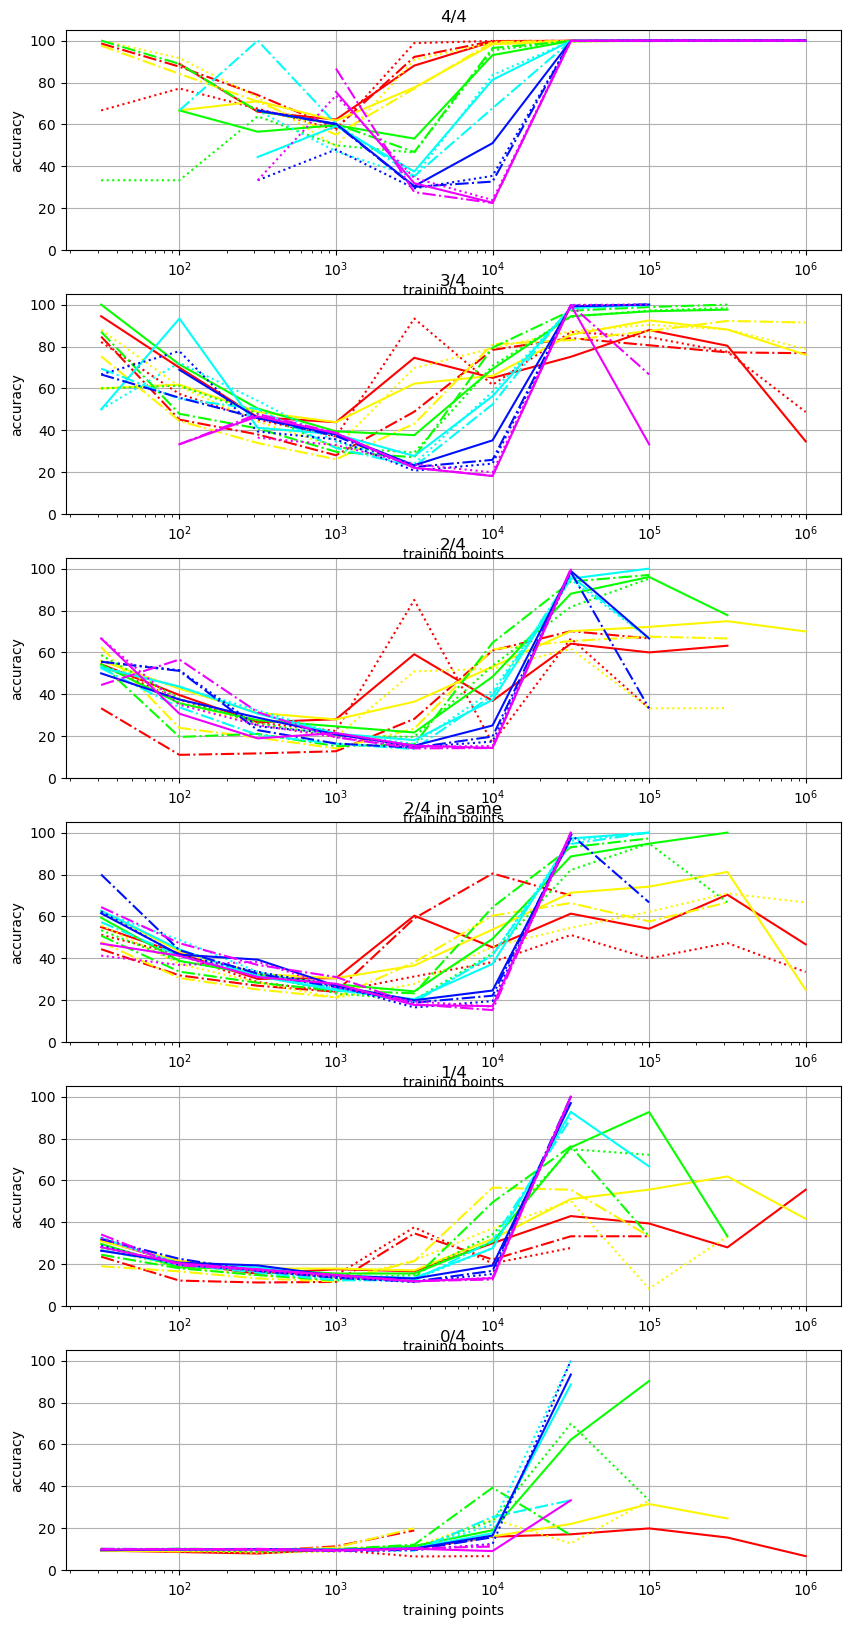

In [4]:
fig, axis = plt.subplots(6, 1, figsize=(10, 20))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4", "3/4", "2/4", "2/4 in same", "1/4", "0/4"]
for i in range(6):
    for j in range(6):
        data = m10_v10_l1[j, :, 5-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=temperature_list[j],linestyle="solid")
        data = m10_v10_l2[j, :, 5-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=temperature_list[j],linestyle="dotted")
        data = m10_v10_l3[j, :, 5-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[i].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(j/6), label=temperature_list[j],linestyle="dashdot")
    # axis[i].legend()
    axis[i].set_ylim(0, 105)
    axis[i].set_title(title_list[i])
    axis[i].grid()
    axis[i].set_xlabel("training points")
    axis[i].set_ylabel("accuracy")


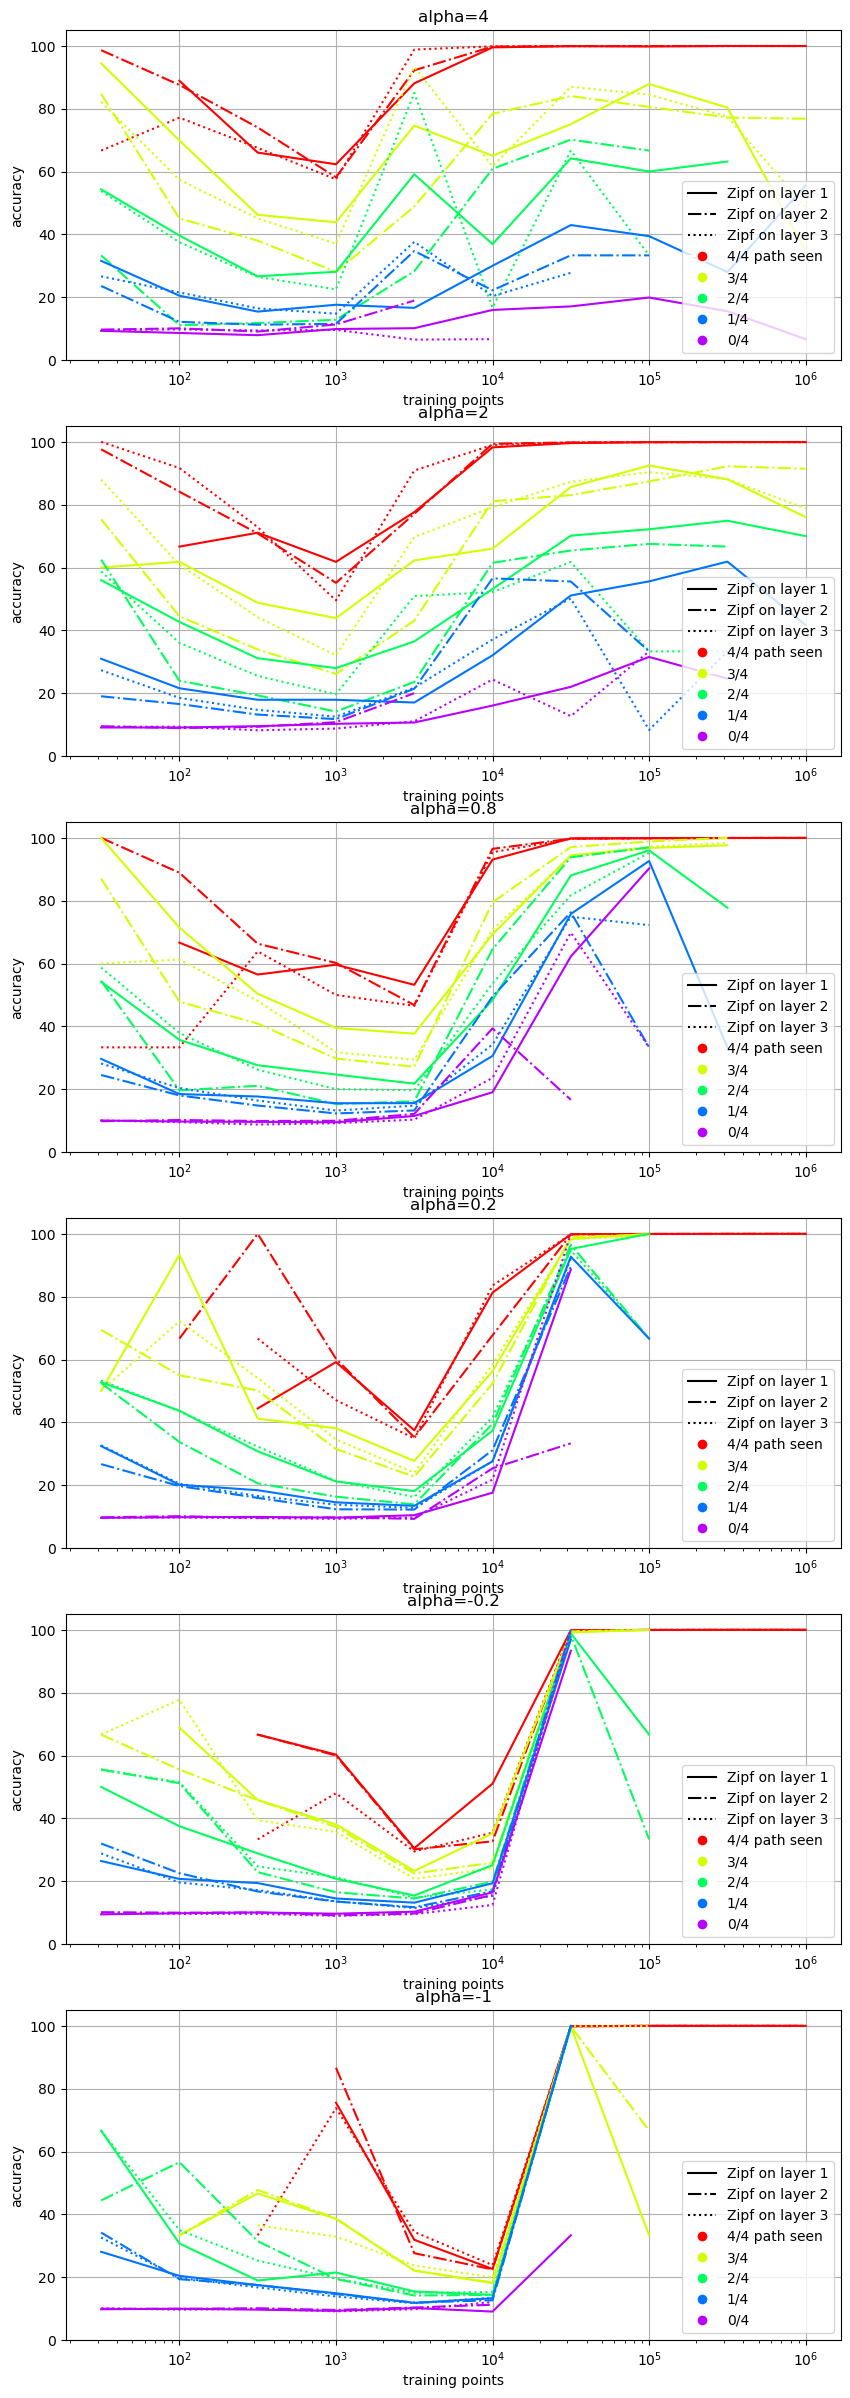

In [29]:

fig, axis = plt.subplots(6, 1, figsize=(10, 30))
temperature_list = [4, 2, 0.8, 0.2, -0.2, -1]
title_list = ["4/4 path seen", "3/4", "2/4", "1/4", "0/4"]
for j in range(6):
    for i in range(5):

        data = m10_v10_l1[j, :, 4-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i],linestyle="solid")
        data = m10_v10_l2[j, :, 4-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i],linestyle="dotted")
        data = m10_v10_l3[j, :, 4-i].numpy()
        non_zero_indices = np.where(data != 0)[0]
        axis[j].semilogx(ptr_list[non_zero_indices], data[non_zero_indices], color=colormap(i/5), label=title_list[i],linestyle="dashdot")
    axis[j].set_ylim(0, 105)
    axis[j].set_title(f"alpha={temperature_list[j]}")
    axis[j].grid()
    axis[j].set_xlabel("training points")
    axis[j].set_ylabel("accuracy")
    axis[j].legend(title="path seen")
    color_legend = [
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(0/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(1/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(2/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(3/5), markersize=8),
        mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(4/5), markersize=8),
        # mlines.Line2D([0], [0], marker='o', color='white', markerfacecolor=colormap(5/5), markersize=8),
    ]

    # color_labels = [r'$\gamma=0.2$', r'$\gamma=0.63$', r'$\gamma=2$', r'uniform case']
    color_labels=title_list
    linestyle_legend = [
        mlines.Line2D([0], [0], linestyle="solid", color='black'),
            plt.Line2D([0], [0], linestyle="dashdot", color='black'),
        mlines.Line2D([0], [0], linestyle="dotted", color='black'),
        ]
    linestyle_labels = ["Zipf on layer 1", "Zipf on layer 2", "Zipf on layer 3"]

    # Merge legends
    all_handles = linestyle_legend + color_legend
    all_labels = linestyle_labels + color_labels

    # Add legends
    axis[j].legend(all_handles, all_labels, loc='lower right')
    axis[j].grid(True)
    
